<a href="https://colab.research.google.com/github/Umesh1307/Play-Store-App-Reviews-Analysis---First-Capstone-Project---Umesh-Rathod/blob/main/Play_Store_App_Reviews_Analysis_First_Capstone_Project_Umesh_Rathod_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
## Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
## Explore and analyze the data to discover key factors responsible for app engagement and success

### Before deep-diving straight into the problem solution, we need to create a roadmap which we will be referring to throughout this exploratory data analysis.
### Google Play Store is a digital store managed and developed by Google, which provides services like installing applications for android and Chrome-based OS users.
### After installing applications some users give reviews and rating for the app they have used, this ratings and reviews defines the satisfaction of the customers, that's directly proportional to the performance of the app. So it is essential to analyze these ratings and reviews to improve the quality of service which will cater to the need of end-users.
### The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. It is of 10k plus Play Store apps for analyzing the Android market. This dataset contains details of different applications and reviews from different users.
### Discussion of Google play store dataset will involve various steps such as
### 1. loading the data into the data frame
### 2. cleaning the data
### 3. extracting statistics from the dataset
### 4. exploratory analysis and visualizations
### 5. questions that can be asked from the dataset
### 6. conclusion

In [151]:
# Let's go importing all the store of weapons needed, just kidding!
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    from pylab import rcParams
    import warnings
    warnings.filterwarnings("ignore")
except BaseException as be:
    print("I don't know what you talking about",be)


In [2]:
# Mount drive with google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1. As per the roadmap we have created let's put feet on the first step i.e loading the dataset into dataframe

In [3]:
# Create the directorial path for data
dir_path="/content/drive/MyDrive/Almabetter Project/Capstone - Projects/Module 1/Play Store App Review - Umesh Rathod"

In [4]:
# Let's read it
play_store_df=pd.read_csv(dir_path+ "/Play Store Data.csv")

In [5]:
# Writing a small for loop to convert uppercase to lowercase and replacing the spaces with underscore
try:
    play_store_df.columns=[str(x).lower().replace(" ","_") for x in play_store_df.columns]
except BaseException as be:
    print(be)

In [6]:
# Check data what it has from top!
play_store_df.head()

app  ...   android_ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

In [7]:
# Check it from bottom
play_store_df.tail()

app  ...         android_ver
10836                               Sya9a Maroc - FR  ...          4.1 and up
10837               Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                         Parkinson Exercices FR  ...          2.2 and up
10839                  The SCP Foundation DB fr nn5n  ...  Varies with device
10840  iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[5 rows x 13 columns]

In [8]:
# Checking the shape of the play store data set.
print(f"The shape of the google play store data set is {play_store_df.shape}, where number of rows are  {play_store_df.shape[0]}  and {play_store_df.shape[1]} columns")

The shape of the google play store data set is (10841, 13), where number of rows are  10841  and 13 columns


In [9]:
# Need to know the null values in each row of columns:
play_store_df.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

## As we can explicitly see that there are 1474 missing values in rating columns. We have to fill these values with proper calculation. . But the question is how to handle the rating columns because we can not assign those as median, mean, or mode as in real life ratings are given by the customers, We are now using forward linear interpolation to fill nan values inside the rating column.

In [10]:
# Missing Value Handling using interpolate forward linear method.
play_store_df.interpolate(method='linear',limit_direction='forward',inplace=True)

In [11]:
# Rechecking for null values
play_store_df.isnull().sum() 

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              1
price             0
content_rating    1
genres            0
last_updated      0
current_ver       8
android_ver       3
dtype: int64

## As we can see there is one missing value in the content rating feature, one missing value inside type features eight missing values inside current_ver and finally three android_ver now we will be filling those two values with appropriate values.

In [12]:
# Filling NAN with suitable values
play_store_df['content_rating'].fillna(value='Everyone',inplace=True)
play_store_df['type'].fillna(value='Free',inplace=True)

In [13]:
# Final Check For Null Values.
play_store_df.isnull().sum().any()

True

In [14]:
# Let's have a look at the information 
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10841 non-null  object 
 1   category        10841 non-null  object 
 2   rating          10841 non-null  float64
 3   reviews         10841 non-null  object 
 4   size            10841 non-null  object 
 5   installs        10841 non-null  object 
 6   type            10841 non-null  object 
 7   price           10841 non-null  object 
 8   content_rating  10841 non-null  object 
 9   genres          10841 non-null  object 
 10  last_updated    10841 non-null  object 
 11  current_ver     10833 non-null  object 
 12  android_ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##Step 2. Mission Cleaning Starts here!
###After looking at the information about all data features in given data set, there is demand to work around data and make it useable flawlessly, Let's get down to business guys!

In [15]:
# Converting the into the proper data structure, though ratings are already a float64, just comfirming.
try:
    play_store_df['rating']=play_store_df['rating'].astype(str).astype(float)
except BaseException as be:
    print(be)

In [16]:
# As we can see in play store info we need to typecast this to the proper integer
try:
    play_store_df['reviews']=play_store_df['reviews'].apply(lambda x:x.replace("3.0M","3000000"))
    play_store_df['reviews']=play_store_df['reviews'].apply(lambda x: int(x))
except BaseException as be:
    print("There is something wrong",be)

In [17]:
# Just converting the number of installs into proper integer number
try:
    play_store_df=play_store_df[play_store_df['installs']!='Free']
    play_store_df['installs']=play_store_df['installs'].apply(lambda x : x.replace("+","")if "+" in str(x) else x)
    play_store_df['installs']=play_store_df['installs'].apply(lambda x: x.replace(",","") if "," in str(x) else x)
    play_store_df['installs']=play_store_df['installs'].apply(lambda x: int(x))
except BaseException as be:
    print("Something is missing boss!",be)

In [18]:
# Price never be an object it should be a float
try:
    play_store_df['price']=play_store_df['price'].apply(lambda x: x.replace("$","") if "$" in str(x) else x)
    play_store_df['price']=play_store_df['price'].apply(lambda x:float(x))
except BaseException as be:
    print("Opps",be)

In [19]:
# Let's fix the size column
try:
    play_store_df['size']=play_store_df['size'].apply(lambda x : str(x).replace("Varies with device","NaN") if "Varies with device" in str(x) else x)
    play_store_df['size']=play_store_df['size'].apply(lambda x:  str(x).replace("M","") if "M" in str(x) else x)
    play_store_df['size']=play_store_df['size'].apply(lambda x:  float(str(x).replace("k",""))/1000 if "k" in str(x) else x)
    play_store_df['size']=play_store_df['size'].apply(lambda x:  float(x))
except BaseException as be:
    print("Check it again",be)

In [20]:
# Fixing last updated object to proper datetime 
try:
    play_store_df['last_updated'].unique()
    play_store_df['last_updated']=pd.to_datetime(play_store_df['last_updated'])
except BaseException as be:
    print("Are you sure",be)

In [21]:
# Unique category 
len(play_store_df['category'].unique())

33

In [22]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             10840 non-null  object        
 1   category        10840 non-null  object        
 2   rating          10840 non-null  float64       
 3   reviews         10840 non-null  int64         
 4   size            9145 non-null   float64       
 5   installs        10840 non-null  int64         
 6   type            10840 non-null  object        
 7   price           10840 non-null  float64       
 8   content_rating  10840 non-null  object        
 9   genres          10840 non-null  object        
 10  last_updated    10840 non-null  datetime64[ns]
 11  current_ver     10832 non-null  object        
 12  android_ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


## Ah! Until now we have been thoroughly cleaning and fixing the data type as required, we havn't explored the single aspect of any features given in data set which will be influencing the result of performance altogether.

## Step 3. Extracting statistics from the dataset
### Here we will be doing some statistical analysis of data using pandas built-in method called describe(). Describe only works for the numerical features but we will try to include as many features as possible.

In [23]:
# Let's take some statistical taste of play store dataframe:
play_store_df.describe(include='all')


app category  ...         current_ver  android_ver
count    10840    10840  ...               10832        10838
unique    9659       33  ...                2831           33
top     ROBLOX   FAMILY  ...  Varies with device   4.1 and up
freq         9     1972  ...                1459         2451
first      NaN      NaN  ...                 NaN          NaN
last       NaN      NaN  ...                 NaN          NaN
mean       NaN      NaN  ...                 NaN          NaN
std        NaN      NaN  ...                 NaN          NaN
min        NaN      NaN  ...                 NaN          NaN
25%        NaN      NaN  ...                 NaN          NaN
50%        NaN      NaN  ...                 NaN          NaN
75%        NaN      NaN  ...                 NaN          NaN
max        NaN      NaN  ...                 NaN          NaN

[13 rows x 13 columns]

In [24]:
# Let's use describe only for numerical column
play_store_df.describe()

rating       reviews         size      installs         price
count  10840.000000  1.084000e+04  9145.000000  1.084000e+04  10840.000000
mean       4.190567  4.441529e+05    21.516530  1.546434e+07      1.027368
std        0.517606  2.927761e+06    22.588748  8.502936e+07     15.949703
min        1.000000  0.000000e+00     0.008500  0.000000e+00      0.000000
25%        4.000000  3.800000e+01     4.900000  1.000000e+03      0.000000
50%        4.300000  2.094000e+03    13.000000  1.000000e+05      0.000000
75%        4.500000  5.477550e+04    30.000000  5.000000e+06      0.000000
max        5.000000  7.815831e+07   100.000000  1.000000e+09    400.000000

## Sorry guys! I'm dumb! We can't find any meaningful insight just looking at the data, neither from top nor bottom though we have used describe, We have just got few information. I think our team needs an update like Google Play Store Apps :)

## Why there are so many unnecessary decimal points followed by each result being displayed in the description, the reason is that if one of the feature entities required decimal points to show its accurate value, pandas try to put that many decimal points for each entity being displayed.


## Now we'll be going to use the superpower of pandas to visualize data in a rigor way.

In [25]:
# installing the pandas profiling
try:
    !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
except BaseException as be:
    Print("Please restart runtime",be) 


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [26]:
# Importing profile report from pandas profiling.
from pandas_profiling import profile_report

In [27]:
# Collecting The Pandas Profile Report.
play_store_df.profile_report()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Pandas Profiling provides us a piece of very basic and useful information about the data without doing any explicit exploratory data analysis. That's what we love about pandas profiling, as we can see in the pandas profiling report it shows the correlation between features, it also shows the number of null values in each features graphically, Basically, pandas profiling tries to cover all the features with their properties.

## Step 4: Exploratory Data Analysis
## In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.
### Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns.
#### Reference(https://en.wikipedia.org/wiki/Exploratory_data_analysis)

In [28]:
# importting my favorite library plotly
import plotly.express as px 

In [29]:
# Distribution of average app rating as per their category
average_rating=play_store_df.groupby(['category','type'],as_index=False)['rating'].median()

In [30]:
# Applying a format with the help of lambda function to restrict the decimal points in rating column
average_rating['rating']=average_rating['rating'].apply(lambda x:"{0:1.1f}".format(x))

In [31]:
# Plotting a bar plot using plotly for average rating per category
px.bar(data_frame=average_rating,x='category',y='rating',text='rating',
       title='Average Rating comparison Between Free vs Paid Applications In Each Category (Category Vs Rating)',color='type')

In [32]:
# Printing the overall mean of the rating for all the categories in play store data
print(f"The average rating for each category is around {round(np.mean(play_store_df['rating']),1)} out of 5")

The average rating for each category is around 4.2 out of 5


## As we can see from above bar plot overall average rating turned out be 4.2 out of 5. We can now clearly distinguish the difference of rating for paid type applications and free type applications for each categories in entire google play store.

In [33]:
# Let's see how application size affects the number of rating
px.scatter(data_frame=play_store_df,x='rating',y='size',color='size',
           title="Scatter Plot Representing the effect of size on the number of rating (Rating Vs Size)")

## The points are more dense at the lower bottom-right, meaning, less sized apps have higher ratings.

In [34]:
# Let's have a look at reviews vs rating
px.scatter(data_frame=play_store_df[play_store_df['reviews']<100000],x='reviews',y='rating',trendline='ols',color='rating',
           title='Scatter Plot With Trendline Represents Reviews Vs Rating',text='rating')



## Obviously, by looking at the above scatter plot with trendline we are able to conclude that lesser the reviews on applications lesser the rating as well.

In [35]:
# Let's see how price of application impacts the number of rating
px.scatter(data_frame=play_store_df,x='price',y='rating',color='type',trendline='ols',text='reviews',
           title='Price Vs Rating')


## Inference - - Of course, as the price of the application increases, there are fewer downloads hence fewer reviews and ratings as we can visualize from the above scatter plot.



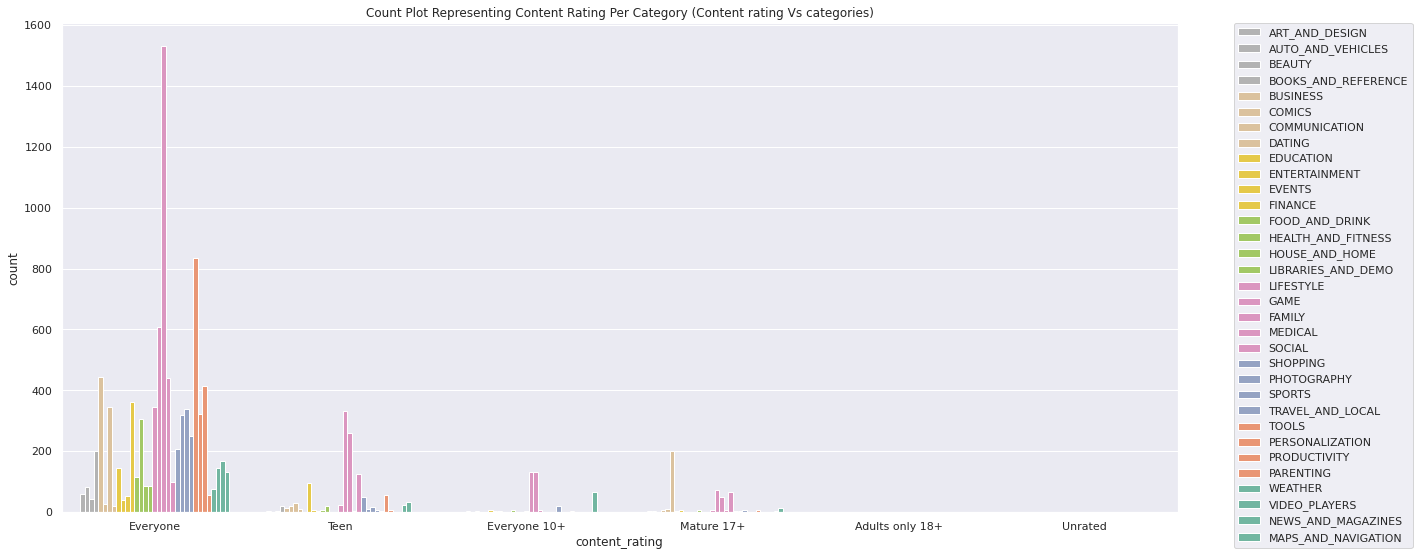

In [153]:
# countplot for content rating
try:
    sns.countplot(x=play_store_df.content_rating,data=play_store_df,hue=play_store_df.category,palette='Set2_r')
    plt.title("Count Plot Representing Content Rating Per Category (Content rating Vs categories)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    sns.set(rc={'figure.figsize':(26,9)})
    plt.show()
except BaseException as be:
    print(be)


## A count plot is a kind of like a histogram or a bar graph for some categorical area. It simply shows the number of occurrences of an item based on a certain type of category.
## Content rating is another feature available in the given google play store data set.
## Content rating describes the minimum maturity of content inside the applications. But doesn’t tells that application is designed for a specific age group. We used the count plot to understand the content rating for each category.
##Most of the applications on google play is having a content rating for everyone. However, only the dating category is for the mature 17+ age group.

In [37]:
# Let's see what kind of content rating applications are being downloaded most.
px.bar(data_frame=play_store_df,x='content_rating',y='installs',color='content_rating',title='Content rating Vs Installs')


## The applications which have a content rating for everyone are being installed most than other.

In [38]:
# Extracting the year and month from the last updated feature.
play_store_df['year'] = pd.DatetimeIndex(play_store_df['last_updated']).year
play_store_df['month']=pd.DatetimeIndex(play_store_df['last_updated']).month

In [39]:
px.box(data_frame=play_store_df,x='category',y='month',
       title='Box Plot Representing the Tendency of the Last Updated For Both Free And Paid Category (Categories Vs Last Update)',
       color='type')

## The above boxplot gives us the range of the last updated date for both free and paid applications. We can conclude from the above box plot that for free categories people usually update more often, whereas this statement is valid for some other paid categories as well.

In [40]:
# Now is the time to see the trend of each application in each year
app_count_per_year=play_store_df.groupby(['year','type'],as_index=False)['app'].count()

In [41]:
# Calculating the percentage of app increase
app_count_per_year['percentage_app_increase']=app_count_per_year['app']*100/app_count_per_year['app'].sum()

In [42]:
# Formatting the percentage column
app_count_per_year['percentage_app_increase']=app_count_per_year['percentage_app_increase'].apply(lambda x: "{0:1.2f}%".format(x))

In [43]:
# Let's see number of percentage application added each year.
px.bar(data_frame=app_count_per_year, x='year',y='app',color='type',text='percentage_app_increase',
       title='Year vs App')

## we can conclude that before 2011 there were no paid apps, but with the years passing free apps has been added more in comparison to paid apps, by comparing the apps updated or added in the year 2011 and 2018 free apps are increases from 0.01% to 64.61% and paid apps are goes from 0.27 to 3.18%. So, we can conclude that most people are after free apps.

In [44]:
# Let's count the application added month wise
app_count_per_month=play_store_df.groupby(['type','month'],as_index=False)['app'].count()

In [45]:
# It's time to visualize the applications added in each month using plotly bar plot
px.bar(data_frame=app_count_per_month,x='month',y='app',color='type',text='app',
       title='Month vs App')

## From the above bar plot we can take inference that most applications are added or updated in the month of July, it is true for both kinds of applications free and paid.

In [46]:
# Calculating number of applications available in each category and storing it in variable categories.
categories=play_store_df.groupby('category')['app'].count().reset_index().sort_values(by='app',ascending=False)

In [47]:
# Resetting the names of columns here
categories.set_axis(['category','count'],axis=1,inplace=True)

In [48]:
# Plotting a bar plot representing the total count of applications in each category using plotly.
px.bar(data_frame=categories,x=categories['category'],y=categories['count'],
       text="count",title='Total Number of Application In Each Category')


## The above count plot is the evidence that category family has the most number of applications available on the google play store, and very few apps are available for the category beauty and parenting. What I believe that beauty comes from inside and parenting should be come as naturally as possible.

In [49]:
# Let's check the number of free and paid applications for each category
unique_last_update=play_store_df.groupby(['category','type'],as_index=False)['app'].count().sort_values(by='app',ascending=False)

In [50]:
# Setting the name of the columns
unique_last_update.set_axis(['category','type','Total Number of applications'],axis=1,inplace=True)

In [51]:
# With the help of plotly bar plot experimenting which kind of applications are being updated the most.
px.bar(data_frame=unique_last_update,x='category',y='Total Number of applications',color='type',
       text='Total Number of applications',title='Total Number Of Free and Paid Applications In Each Category')

## The above Bar plot shows the total number of free and paid applications in each category. The family category has 191 paid applications and 1781 are free applications. We can an explicit number of paid applications in red color and sky-blue color holds the number of free applications.
 
## Almost in each category there are more number of free applications than the paid one.

In [52]:
# Let's calculate the most installed android version 
most_install_android_version=play_store_df.groupby(['android_ver','type'])['installs'].sum().reset_index().sort_values(by='installs',ascending=False)

In [53]:
# Converting sum of installs into log2 scale and creating a new column named log2 installs 
most_install_android_version['log2_installs']=np.log2(most_install_android_version['installs'])

In [54]:
# Applying a format to restrict the decimal points to avoid overwhelming of decimal points in installs columns
most_install_android_version['log2_installs']=most_install_android_version['log2_installs'].apply(lambda x:"{0:1.1f}".format(x))

In [55]:
# using plotly bar plot let's visualize which android version being installs along with its category type 
px.bar(data_frame=most_install_android_version,x='android_ver',y='log2_installs',color='type',
       text='log2_installs',title='Most Installed Android Version With Respect to Type')

## From the above bar plot it can be understood that most installed applications android version varies with the device, second highest installed android version is 4.1 and up 

In [56]:
# Let's have a look at number of application as per the current version
current_version_available=play_store_df.groupby('current_ver')['app'].count().reset_index().sort_values(by='app',ascending=False)

In [57]:
# Top 25 current version with most number of applications
current_version_available=current_version_available.head(25)

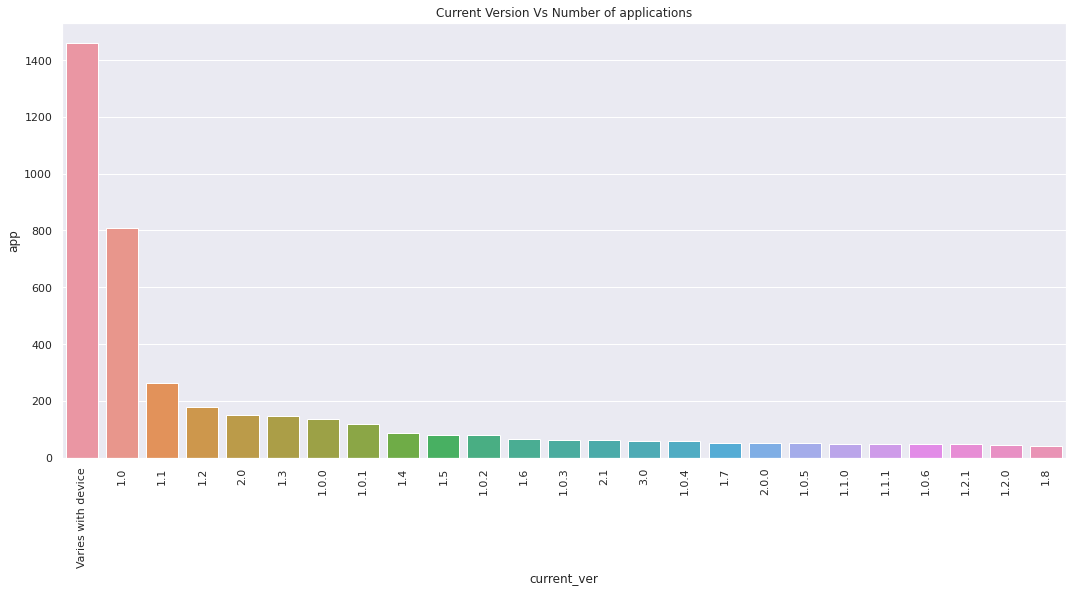

In [143]:
# Let's use seaborn barplot this time 
sns.barplot(data=current_version_available,x='current_ver',y='app')
plt.xticks(rotation=90)
plt.title("Current Version Vs Number of applications")
sns.set(rc={'figure.figsize':(26,12)})
plt.show()

## From the above seaborn barplot we can recognize that most of the applications has current version which varies with the device.

## Exploring the correlation between the size of the app and the version of Android on the number of installs.

In [59]:
# let's explore android version vs installs vs size of applications.
size_vs_android_ver=play_store_df.groupby(['android_ver','size'])['installs'].sum().reset_index()

In [60]:
# Transforming the installs into proper format.
try:
    size_vs_android_ver['installs']=np.log2(size_vs_android_ver['installs'])
    size_vs_android_ver['installs']=size_vs_android_ver['installs'].apply(lambda x: "{0:1.1f}".format(x))
except Exception as be:
    print(be)

In [61]:
# Now use plotly for visualization
px.bar(data_frame=size_vs_android_ver,x='android_ver',y='installs',color='size',text='installs',
       title='Android version vs Installs vs Size')

## From the above bar plot, we can see the range of application size and installs in each android version. 4.1 and up android version has the highest number of installs and the size of the application is mostly in the range of 0 to 40 Mb.

In [62]:
# Now i'm curious to know number application in each genres
genres_count=play_store_df.groupby('genres')['app'].count().reset_index().sort_values(by='app',ascending=False)

In [63]:
# setting the colum name
try:
    genres_count.set_axis(['genres','Number of applications'],axis=1,inplace=True)
except BaseException as be:
    print(be)

In [64]:
# I'm putting a restriction upto top 25 genres
genres_count=genres_count.head(25)

In [65]:
# It's time to see the top 25 genres with most applications
px.bar(data_frame=genres_count,x='genres',y='Number of applications',text='Number of applications',color='genres',
       title='TOP 25 Genres By Number Of Applications')

## From the above countplot we can see the tools genres has the most number of applications, we can see the total number of application in top 25 genres.

In [66]:
# Groupby on genres and and summing installs to know the highest installs generes
most_installed_genres=play_store_df.groupby('genres')['installs'].sum().reset_index().sort_values(by='installs',ascending=False)

In [67]:
# Converting the installs into np log2 scale and storing in a new colum.
try:
    most_installed_genres['log2_installs']=np.log2(most_installed_genres['installs'])
    most_installed_genres['log2_installs']=most_installed_genres['log2_installs'].apply(lambda x:"{0:1.1f}".format(x))
except BaseException as be:
    print(be)

In [68]:
# Let's visualize top 25 installed genres.
most_installed_genres=most_installed_genres.head(25)

In [69]:
# Plotting the bar plot for top 25 genres that being installed most.
px.bar(data_frame=most_installed_genres,x='genres',y='log2_installs',text='log2_installs',
       color='genres',title='Most Installed 25 Genres (Genres Vs Installs)')

## Genres communication has the highest number of installs and second highest downloads are for the productivity genres.

In [70]:
# Grouby category and summing the price 
price_per_category=play_store_df.groupby('category',as_index=True)['price'].sum().reset_index()

In [71]:
# Applying lambda function for proper formatting upto 1 float point decimal of price values.
price_per_category['price']=price_per_category['price'].apply(lambda x: "{0:1.1f}$".format(x))

In [72]:
# Plotting bar plot using plotly.
px.bar(data_frame=price_per_category,x='category',y='price',text='price',
       title='Price per category in dollars for paid type applications only (Categories Vs Price)')

## One can clearly understand that applications from the category finance have high price than any others, family category applications are second high priced applications, at third we have lifestyle category applications and at last, we have medical category applications, these four categories application charges high price when compared with others.

In [73]:
# Category with the Most Reviews:
most_reviewed_category=play_store_df.groupby('category',as_index=False)['reviews'].sum()  

In [74]:
# Calculating total number of reviews in entire given google play store data set storing it into total reviews variable
total_reviews=play_store_df['reviews'].sum()

In [75]:
# Calculating percentage review and creating a new column for that.
most_reviewed_category['percentage_review']=most_reviewed_category['reviews']*100/total_reviews

In [76]:
# Applying lambda function for proper formatting on newly created percentage review column
most_reviewed_category['percentage_review']=most_reviewed_category['percentage_review'].apply(lambda x: "{0:1.2f}%".format(x))

In [77]:
# Plotting a bar plot using plotly to find out which category has most reviews and which category has least
px.bar(data_frame= most_reviewed_category, x ="category", y = "reviews",
                     title='Most Reviewed Category in Percentage Reviews (Categories Vs Reviews)',text="percentage_review")


## As we can check gaming category have highest percentage reviews, The second highly reviewed category is communication. For events category there are almost no reviews, second least reviewed category beauty

In [78]:
# Category with the most space required we are talking about size of application available in the each category:
most_space_required_category=play_store_df.groupby('category',as_index=False)['size'].sum().sort_values(by='size',ascending=False)

In [79]:
# Total size in entire given google play store data set
total_size=play_store_df['size'].sum()

In [80]:
#calculating the percentage size and creating a new column inside most space required category dataframe
most_space_required_category['percentage_space_required']=most_space_required_category['size']*100/total_size

In [81]:
# Applying lambda function for proper formatting on newly created percentage space required column.
most_space_required_category['percentage_space_required']=most_space_required_category['percentage_space_required'].apply(lambda x: "{0:1.2f}%".format(x))

In [82]:
# Plotting a bar plot using plotly to know which categories of application takes most space inside the google play store
px.bar(data_frame=most_space_required_category,x="category",y='size',
       title="Most Space Consuming Category (Categories Vs Size)",text='percentage_space_required')

## The conclusion is that Family apps consume most space in google play store out 100% space, they hold 26.37% space, and the second most space-consuming category is games. This means that the volume of application that are belongs to family and game category is way higher compared to other categories.

In [83]:
# Creating a dataframe for categories alongwith their number of installs
unique_category=play_store_df.groupby('category',as_index=False)['installs'].sum()

In [84]:
# Calculating the total installs in entire given play store data set
total_installs=play_store_df['installs'].sum()

In [85]:
# Creating a new column percentage intalls 
unique_category['percentage_installs']=unique_category['installs']*100/total_installs

In [86]:
# Applying lambda function for proper formatting of values inside percentage installs upto 1 float point decimal
unique_category['percentage_installs']=unique_category['percentage_installs'].apply(lambda x: "{0:1.2f}%".format(x))

In [87]:
# Plotting bar plot using plotly to find out the percentage installs of each category, here color parameter i have added for understanding the range of number of installs.
px.bar(data_frame=unique_category,x="category",y="installs",text='percentage_installs',color='installs',
       title='Most Installed Category in Percentage Installs (Categories Vs Installs)')


## On the right-hand side of the above bar plot, there is scale available installs, which we can relate with the heatmap correlation scale, It's interesting right, Now we can easily interpret that the game category has the highest percentage of installs that is 20.93% around 21% and second highest is communication have 19.48% percentage installs.

## After performing all of the above three tasks on each category on the basis of reviews, space required, and installation. we can dominantly conclude that the apps that belong to the gaming category have the highest reviews and installation. While applications that belong to the family category consume high space compare to other categories on the google play store. We can figure out that the second-highest installation is happening for the category of communication, people are working on their communication skills that' great to know!

In [88]:
# Let's check the number of installation according category type
category_type_wise_installs=play_store_df.groupby(['category','type'],as_index=False)['installs'].sum()

## There are two main type category one is free and another one is paid, So we want to know which category of applications people prefers to use.

In [89]:
# Checking the head of category type wise installs dataframe
category_type_wise_installs.head(4)

category  type   installs
0     ART_AND_DESIGN  Free  124322100
1     ART_AND_DESIGN  Paid      16000
2  AUTO_AND_VEHICLES  Free   53080061
3  AUTO_AND_VEHICLES  Paid      50150

## As we can see There is a huge difference between free category installs and paid category installs, if we plot this we might end up with something inappropriate conclusion, so it leads us to use the np.log2 function which converts complex input into a proper scale.

In [90]:
# Converting installs into a suitable scale using np.log2
category_type_wise_installs['log2_installs']=np.log2(category_type_wise_installs['installs'])

In [91]:
# Now we can see that installs look preety drawable.
category_type_wise_installs.head(4)

category  type   installs  log2_installs
0     ART_AND_DESIGN  Free  124322100      26.889508
1     ART_AND_DESIGN  Paid      16000      13.965784
2  AUTO_AND_VEHICLES  Free   53080061      25.661667
3  AUTO_AND_VEHICLES  Paid      50150      15.613962

In [92]:
# Apply lambda function to convert into a proper format
category_type_wise_installs['log2_installs']=category_type_wise_installs['log2_installs'].apply(lambda x: "{0:1.1f}".format(x))

In [93]:
# Plotting plotly bar plot so as to understand category type effect on number of installs
px.bar(data_frame=category_type_wise_installs,x="category",y='log2_installs',text='log2_installs',color='type',
       title="Bar Plot Representing Category Type Effect on installation Numbers (Categories Vs Installs Vs Type)")


## Obiviously from above barplot, apps that are belongs to type free have more installation rate than that of paid, So people are more willing to go with free applications

In [94]:
# Now let's see will size of the application affect the installation rate
try:
    category_size_installs=play_store_df.groupby(['type','size'],as_index=False)['installs'].sum()
    category_size_installs['log2_installs']=np.log2(category_size_installs['installs'])
except BaseException as be:
    print(be)

In [95]:
# Applying proper formatting for newly created column
category_size_installs['log2_installs']=category_size_installs['log2_installs'].apply(lambda x: "{0:1.1f}".format(x))

In [96]:
# Let's plot it by using scatter plot
px.scatter_3d(data_frame=category_size_installs,x='size',y='log2_installs',z='type',color='type',
              title='Size Vs Type Vs Installs')

## We can draw a conclusion by observing and visualizing to above scatter plot. Whether the application belongs to free type or paid type. Most of the customers on google play store prefers to install, small size application. Most installation rates can be observed between the application size 0 to 20 MB.

In [97]:
# Let's how 2D_scatter plot will look.
px.scatter(data_frame=category_size_installs,x='size',y='log2_installs',color='type',
           title="ScatterPlot Representing the Size and Category Type Effect on Number of Installations (Size Vs Installs Vs Type)")

## By pointing the cursor we can explore each and every point in scatter plot using plotly, that's the only reason to use plotly, anyway i need to find out the ways to share these interactive graph in powerpoint. Even though size got increased in free category people are ok with that, as we can see in above scatter plot, people still downloading more free type application that has big size compared to paid application with big size.

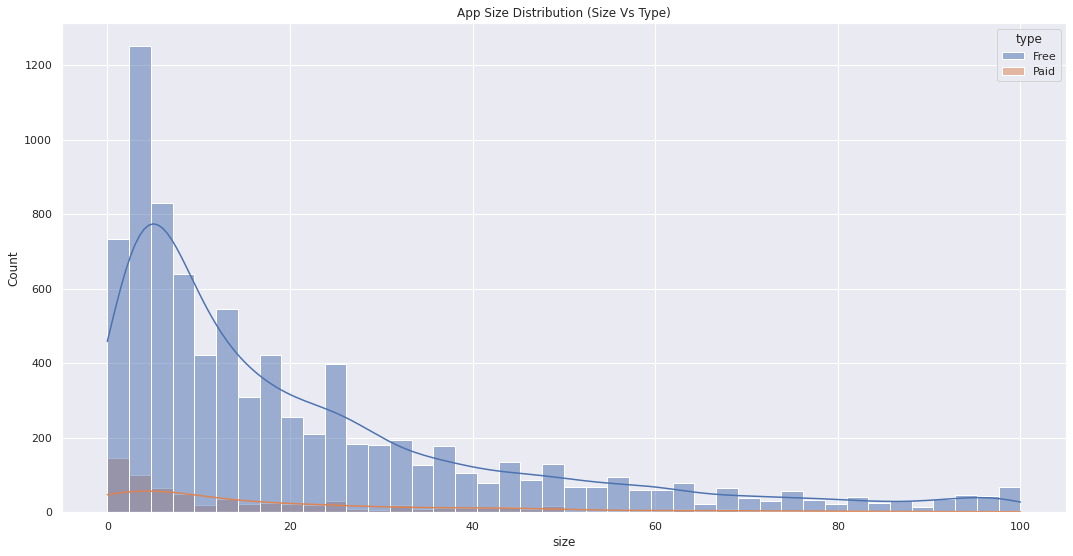

In [146]:
# We can analize this fact that people often install less size application with the help of below histogram.
sns.histplot(data=play_store_df, x='size',hue='type',kde=True)
plt.title("App Size Distribution (Size Vs Type)")
sns.set(rc={'figure.figsize':(18,9)})
plt.show()

## By observing the above histogram with KDE (Kernal density estimation) KDE line for paid type applications represented in orange color whereas sky-blue colored KDE line for the free type applications we are able to draw a conclusion that there are maximum number of applications whose range of size is between 0 to 25 or 30 Mb.

## The size of the application has a considerable impact on the performance and space and power consumption of the device. So it is advisable to keep the size of the application optimized.

In [99]:
# Plotting the bar plot to explore the size distribution for both free and paid applications
px.box(data_frame=play_store_df,x='type',y='size',color='type',title='Size Distribution For Both Free and Paid Applications')

## The above box plot shows that the median for the free type application is 13 MB whereas for the paid type application median is 9.5 MB. Most of the free type of applications has the size in the range of 0 to 30 MB, Whereas for the most paid applications is in the range of 0 to 28 MB.

In [100]:
# Let's check which factor has the great correlation with each other in our google play store data
play_store_df.corr()

rating   reviews      size  installs     price      year     month
rating    1.000000  0.063281  0.069440  0.047811 -0.020100  0.122414  0.011384
reviews   0.063281  1.000000  0.238215  0.643122 -0.009667  0.075537  0.045930
size      0.069440  0.238215  1.000000  0.164787 -0.023006  0.215468  0.039626
installs  0.047811  0.643122  0.164787  1.000000 -0.011689  0.089368  0.056447
price    -0.020100 -0.009667 -0.023006 -0.011689  1.000000 -0.007897  0.006943
year      0.122414  0.075537  0.215468  0.089368 -0.007897  1.000000 -0.187306
month     0.011384  0.045930  0.039626  0.056447  0.006943 -0.187306  1.000000

### Opps! It puzzling my mind to find out the correlation just looking at it, anyway I understand that there are only five features are correlated. I have great plan let's visulize it by seaborn heatmap

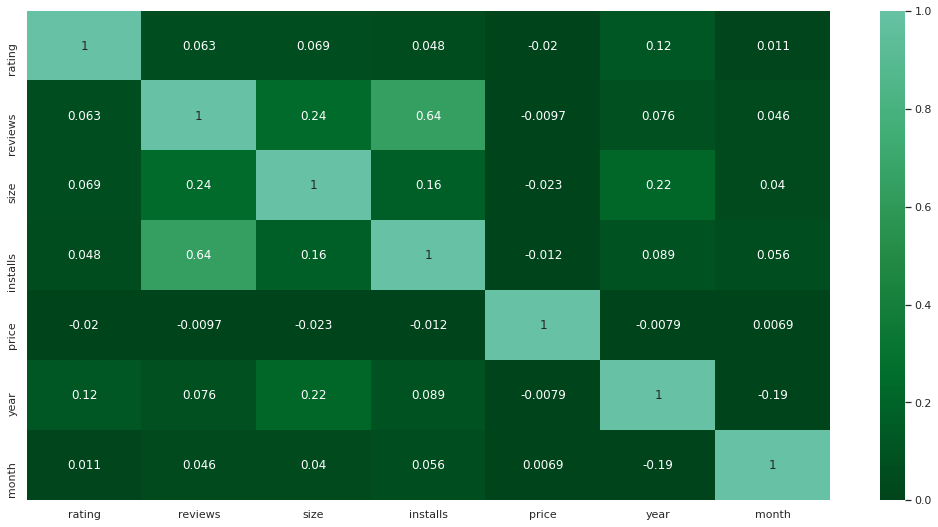

In [147]:
# Let's see it 
import seaborn as sns; sns.set_theme()
sns.heatmap(play_store_df.corr(),annot=True,cmap="BuGn_r",center=True,cbar=True,vmin=0,vmax=1)
sns.set(rc={'figure.figsize':(16,7)})
plt.show()

### At this moment in time, I'm pretty much confident to say that firstly reviews and installs are highly correlated with each other, secondly, reviews and size are highly correlated. Thirdly reviews are correlated with size, This is what I'm getting from the above heatmap.


### Now we have data of reviews given by the end-users, so we will be trying to extract some useful insights from reviews data. The same process we will be following as we followed till now!

# Out of Curiosity Questions and Answers for that:

## Q1. Top Seven Most Installed Applications?

In [102]:
# Let's have a look the top 10 applications with highest number of installs.
Top_7_applications_by_installs=play_store_df.groupby(['app','category','rating'])['installs'].sum().reset_index().sort_values(by='installs',ascending=False)
Top_7_applications_by_installs.head(7)

app  ...    installs
8168                            Subway Surfers  ...  6000000000
4981                               Google News  ...  4000000000
5170                                  Hangouts  ...  4000000000
4985                             Google Photos  ...  4000000000
5455                                 Instagram  ...  4000000000
4972                              Google Drive  ...  4000000000
6228  Messenger – Text and Video Chat for Free  ...  3000000000

[7 rows x 4 columns]

In [103]:
print(f'The 7 apps that have the most number of installs are: {", ".join(Top_7_applications_by_installs["app"].head(7))}')

The 7 apps that have the most number of installs are: Subway Surfers, Google News, Hangouts, Google Photos, Instagram, Google Drive, Messenger – Text and Video Chat for Free


## Top 7 Most Reviewed Applications?

In [104]:
top_7_most_reviewed_applications=play_store_df.groupby(['app','category','rating'], as_index=True)['reviews'].sum().reset_index().sort_values(by='reviews',ascending=False)
top_7_most_reviewed_applications.head(7)

app  ...    reviews
5455                                 Instagram  ...  266241989
9141                        WhatsApp Messenger  ...  207348304
6228  Messenger – Text and Video Chat for Free  ...  169932272
8168                            Subway Surfers  ...  166331958
4366                                  Facebook  ...  156286514
2588                            Clash of Clans  ...  134677334
2381                          Candy Crush Saga  ...  134573681

[7 rows x 4 columns]

In [105]:
print(f'The 7 apps that have the most number of total reviews are: {", ".join(top_7_most_reviewed_applications["app"].head(7))}')


The 7 apps that have the most number of total reviews are: Instagram, WhatsApp Messenger, Messenger – Text and Video Chat for Free, Subway Surfers, Facebook, Clash of Clans, Candy Crush Saga


## Top 7 Highly Priced Applications?**bold text**

In [106]:
top_7_highly_priced_applications=play_store_df.groupby(['app','category'])['price'].sum().reset_index().sort_values(by='price',ascending=False)
top_7_highly_priced_applications.head(7)

app   category   price
5372           I'm Rich - Trump Edition  LIFESTYLE  400.00
5343                 I AM RICH PRO PLUS    FINANCE  399.99
5360                          I am Rich    FINANCE  399.99
9624             most expensive app (H)     FAMILY  399.99
5373  I'm Rich/Eu sou Rico/أنا غني/我很有錢  LIFESTYLE  399.99
5369                 I am rich(premium)    FINANCE  399.99
5367     I am rich (Most expensive app)    FINANCE  399.99

In [107]:
print(f'The top 7 most expensive apps in the store are: {", ".join(top_7_highly_priced_applications["app"].head(7))}')

The top 7 most expensive apps in the store are: I'm Rich - Trump Edition, I AM RICH PRO PLUS, I am Rich, most expensive app (H), I'm Rich/Eu sou Rico/أنا غني/我很有錢, I am rich(premium), I am rich (Most expensive app)


In [108]:
# Defining a directorial path for user review csv
user_path="/content/drive/MyDrive/Almabetter Project/Capstone - Projects/Module 1/Play Store App Review - Umesh Rathod"

In [109]:
# Reading out the data
user_review_df=pd.read_csv(user_path+ "/User Reviews.csv")

In [110]:
# Replacing the spaces between column names with underscore and converting all of then to lowercase
user_review_df.columns=[str(x).lower().replace(" ","_") for x in user_review_df.columns]

In [111]:
# Merging user reviews df with play store df on the basis of common feature app
merged_df1=play_store_df.merge(user_review_df,on='app')

In [112]:
# Checking the head of merged df
merged_df1.head(2)

app  ... sentiment_subjectivity
0  Coloring book moana  ...               1.000000
1  Coloring book moana  ...               0.833333

[2 rows x 19 columns]

In [113]:
# Printing the shape of the merged df
print(f"The shape of the merged_df is {merged_df1.shape}. It has {merged_df1.shape[0]} row labels and {merged_df1.shape[1]} features")

The shape of the merged_df is (122662, 19). It has 122662 row labels and 19 features


### The shape google play store data frame was the (10840,13). Now we have merged the user reviews data frame on the app feature. So now we can see that we have four new columns inside the merged data frame. I need to understand the meaning of this feature first
### Sentiment: It is emotion, feeling, opinion, a view that is held or expressed. It could be critical to analysis sometimes. Sentiment determines the attitude of writer's whether it is positive, negative, or neutral
### Sentiment Polarity: Sentiment polarity is a float value ranging from a negative one to a positive one.
### i.e range (-1, 1, dtype=float) where -1 means negative statement 1 means positive statement
### Sentiment Subjectivity: Sentiment Subjectivity refers to personal emotion, opinion, views, or judgment. Subjectivity Sentiment ranges from 0 to 1 where 0 is most objective and 1 is more subjective.

In [114]:
# checking the information about merged dataframe.
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   app                     122662 non-null  object        
 1   category                122662 non-null  object        
 2   rating                  122662 non-null  float64       
 3   reviews                 122662 non-null  int64         
 4   size                    75432 non-null   float64       
 5   installs                122662 non-null  int64         
 6   type                    122662 non-null  object        
 7   price                   122662 non-null  float64       
 8   content_rating          122662 non-null  object        
 9   genres                  122662 non-null  object        
 10  last_updated            122662 non-null  datetime64[ns]
 11  current_ver             122662 non-null  object        
 12  android_ver             122662

In [115]:
# Checking how many null values are present inside the dataframe.
merged_df1.isnull().sum()

app                           0
category                      0
rating                        0
reviews                       0
size                      47230
installs                      0
type                          0
price                         0
content_rating                0
genres                        0
last_updated                  0
current_ver                   0
android_ver                   0
year                          0
month                         0
translated_review         50057
sentiment                 50047
sentiment_polarity        50047
sentiment_subjectivity    50047
dtype: int64

In [116]:
# Dropping the null values inside the data frame
merged_df1.dropna(axis=0,inplace=True)

In [117]:
# Rechecking for the null values if any
merged_df1.isnull().sum().any()

False

In [148]:
# Plotting the histogram representing the sentiment subjectivity distribution
plt.hist(data=merged_df1,x='sentiment_subjectivity')
plt.title("Sentiment Subjectivity Distribution")
plt.xlabel("Sentiment Subjectivity")
plt.ylabel("Count")
sns.set(rc={'figure.figsize':(16,7)})
plt.show()

### From above distribution of subjectivity it can be conclude that Most possible sentiment subjectivity ranges from 0.4 to 0.7. So it can be stated that customers gives reviews as per their experience with service of the applications.

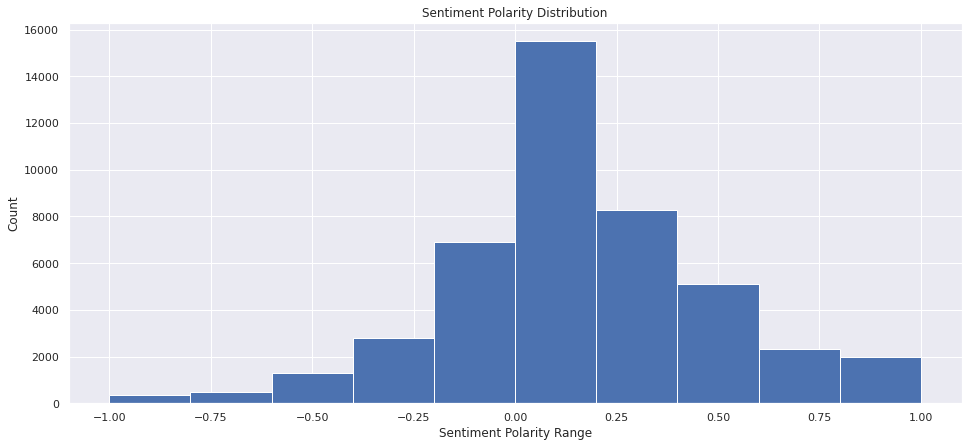

In [149]:
# Plotting histogram representing the Sentiment Polarity Distribution.
plt.hist(merged_df1['sentiment_polarity'])
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Sentiment Polarity Range")
plt.ylabel("Count")
sns.set(rc={'figure.figsize':(16,7)})
plt.show()

### Sentiment polarity distribution shows that for maximum time it is in the range of positive 1.0. So we can say that sentiment polarity of user reviews on google play store is more likey positive one.

In [150]:
# Let's see the distribution of reviews sentiment:
try:
    sentiment_count=merged_df1['sentiment'].value_counts().to_list()

    labels=['Positive Reviews','Negative Reviews',"Netural Reviews"]

    plt.pie(x=sentiment_count,labels=labels,autopct="%.2f%%",radius=1.1,shadow=True,explode=[0,0.03,0.001])

    plt.title("Percentage Distribution Of Review Sentiments")

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    plt.show()
    sns.set(rc={'figure.figsize':(18,8)})
except BaseException as be:
    print(be)

### From the above pie chart, it can easily be understood that there is around 64% of user reviews sentiment is positive, around 25% of reviews sentiment is negative and the remaining around 11% of reviews sentiment is neutral.

In [121]:
# Importing factorial from scipy special and installing statsmodels--upgrade
try:
    from scipy.special import factorial
    !pip install statsmodels --upgrade
except BaseException as be:
    print("You may want to restart the runtime",be) 


In [122]:
# Creating a dataframe by extracting three columns from the merged_df1
sentiment_analysis=merged_df1[['sentiment_polarity',"sentiment_subjectivity","sentiment"]]

In [123]:
sentiment_analysis.head(2)

sentiment_polarity  sentiment_subjectivity sentiment
0              -0.250                1.000000  Negative
1              -0.725                0.833333  Negative

In [124]:
# Just replacing the reviews name with some short a acronym
try:
    sentiment_analysis['sentiment']=sentiment_analysis['sentiment'].apply(lambda x: x.replace("Positive","P").replace("Neutral","Neu").replace("Negative","N"))
except BaseException as be:
    print(be)

In [125]:
# Let's visualize the reviews with help of plotly scatterplot with trendline.
px.scatter(data_frame=sentiment_analysis,x='sentiment_polarity',y='sentiment_subjectivity',color='sentiment',text='sentiment',
           trendline='ols',title='Scatter Plot Representing the Spread of Sentiment Polarity Vs Sentiment Subjectivity')

## For the purpose of the visibity I have used short keywords to denotes the reviews as follows
## for postive reviews= P
## for negative reviews= N
## for neutral reviews = Neu

### By looking at the above scatter plot drawn by plotly, we can see that more than half of negative review statements are subjective in nature and half are objective, what it means is objective statements are given on basis of fact or experience about the application performance, subjective statements are feeling based. There is large number of positive reviews which are also comes under objective statement and subjective statement. There are neurtral reviews as well it means users with no reviews.

### Trendline in above scatterplot denotes the area of subjective and objective statements, the region above the trend line we can called it as subjective statements and region below the trendline it can called as objective statements. It is applicable for both negative reviews and positive reviews.

In [126]:
# Let's calculate the actual number of reviews for each kind of sentiment
sentiment=merged_df1.groupby("sentiment")['sentiment_polarity'].count()

In [127]:
# Resetting the index
sentiment=sentiment.reset_index()

In [128]:
# Let's see what we have
sentiment

sentiment  sentiment_polarity
0  Negative               11843
1   Neutral                5034
2  Positive               28169

In [129]:
# Let's visualize those number with help of my favorite library
px.bar(data_frame=sentiment,x='sentiment',y="sentiment_polarity",text="sentiment_polarity",color="sentiment",title="Number of Reviews For Each Sentiments")

## The total number of positive reviews is 28169 which is way higher than 11843 negative reviews, and there are 5034 neutral reviews statements.

## We have determined the sentiment of the review in terms of ratio which turns around 63:26:11 For positive reviews statement, negative reviews statement, and neutral reviews statements respectively.

## Exploring reviews and sentiment of the users as per the the category of the application.

In [130]:
# Let's deep dive into reviews sentiment in each category
review_sentiment_per_category=merged_df1.groupby(['category','sentiment'],as_index=False)['reviews'].sum()

In [131]:
# transforming the sum of reviews into proper format for sake of visibility while plotting.
try:
    review_sentiment_per_category['reviews']=np.log2(review_sentiment_per_category['reviews'])
    review_sentiment_per_category['reviews']=review_sentiment_per_category['reviews'].apply(lambda x: "{0:1.1f}".format(x))
except BaseException as be:
    print(be)

In [132]:
# Let's again use plotly to see the actual number for each kind of sentiment per category
px.bar(data_frame=review_sentiment_per_category,x='category',y='reviews',color='sentiment',text='reviews',
       title='Category vs Reviews vs Sentiment')

## Now we are able to see the actual number of reviews along with each kind of sentiment per category, a large number of reviews are neutral, we always consider that neutral review has no impact on overall reviews but it is not a completely true fact, because neutral reviews are of two types 1. mixed type neutral reviews it contains both the positive and negative reviews 2. The second type is indifferent neutral reviews where no explicit positive and negative feedback is included. Mixed type reviews play important role for readers to understand the overall feedback of reviews.

# Conclusion:
## That's it! We reached the end of our exercise. As per our Exploratory Data Analysis on the google play store data and user reviews data, An ideal application on the google play store should have the following properties/characteristics
## 1. Category Type: We have observed that a large number of customer on the google play store expects that application should belong to the category free. Some people are using paid category applications as well but that price should be justified with the intended performance of the application.



## 2. Size vs install vs type: As we have observed in the size vs installation vs type scatterplot, the ideal size of the application should be below 40 MB and max up to 50 MB. we have seen that peoples are less interested to install and use heavy-size applications even though the application is free of cost.

## 3. Reviews vs install: We have experienced from the seaborn heatmap that reviews on the google play store are highly correlated with the rate of installation. Reviews are given by users as per their experience with the application. So reviews on the application should be examined properly to get to know the performance of the application, whether it is catering to the need of users, From review, we will get an idea on which aspect to work on

## 4. The most installed, priced, sized, reviewed category: As we have explored applications belongs to the category gaming and followed by communication are being installed the most, secondly, applications from the productivity category followed by the social media category are being installed the most, It gives us tips to choose domain as per the customer affection inclination.

## Most space consuming category bar plot gives us the idea that which category has the most variety of applications available,and which has low. The category which consumes high space inside the google play store, it means it has more number of applications than other categories. So we have to take a signficant decsion to decide category for our future applications.


## 5. Size vs Rating vs Reviews vs Price: We have seen that if there are fewer number reviews, there will be a lesser number of ratings, and as a price increase, there are fewer ratings as there are fewer downloads.

## 6. Android version vs installs vs size: We observed that android version 4.1 and up is being installed most and the size of the application is ranging from 0 to 40 Mb. It is a hint for us to choose the version for the applications.





# Thank You Guys!
